Logistic Regession

Logistic regression is a supervised machine learning algorithm for binary classification (e.g., spam vs. not spam). It predicts the probability of an instance belonging to a class using the sigmoid function to map a polynomial combination of features to a range [0, 1].

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.model_selection import train_test_split

iris dataset 

This loads the built-in Iris dataset using scikit-learn's load_iris() function.

The dataset contains:

150 samples of iris flowers

4 features per sample: sepal length, sepal width, petal length, petal width

Target labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)



spliting dataset through builtin function of sklearn 

In [2]:
def prepare_data():
    iris = load_iris()
    # Keep only Setosa and Versicolor (binary classification)
    X = iris.data[iris.target != 2]
    y = iris.target[iris.target != 2]

    # Split the dataset into training and testing data
    # 80% for training, 20% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    #  just transpose for consistency
    X_train = X_train.T
    X_test = X_test.T

    
    # Reshaping labels to be consistent (1 row, multiple samples)
    y_train = y_train.reshape(1, -1)
    y_test = y_test.reshape(1, -1)

    return X_train, X_test, y_train, y_test


spliting dataset through slicing

In [3]:
# def prepare_data():
#     iris = load_iris()
#     X = iris.data
#     y = iris.target

#     # Get indices where class is not 2 (i.e., keep only Setosa and Versicolor)
#     idx = np.where(y != 2)[0]  # Get indices of class 0 and 1

#     X = X[idx, :]  # Slice rows using selected indices
#     y = y[idx]     # Slice labels

#     # Manually split the data into 80% training and 20% testing using slicing
#     num_train = int(0.8 * len(X))  # Calculate the number of training samples (80% of the total data)

#     # Split the data
#     X_train = X[:num_train, :]  # First 80% for training
#     X_test = X[num_train:, :]   # Remaining 20% for testing
#     X_train = X_train.T
#     X_test = X_test.T


#     y_train = y[:num_train]     # Corresponding labels for training
#     y_test = y[num_train:]      # Corresponding labels for testing
#     y_train = y_train.reshape(1, -1)
#     y_train = y_train.reshape(1, -1)
#     y_test = y_test.reshape(1, -1)


#     return X_train, X_test, y_train, y_test


cancer dataset

In [4]:
# def prepare_data():
#     data = load_breast_cancer()
#     X = data.data        # Features
#     y = data.target 
#     # Split the dataset into training and testing data
#     # 80% for training, 20% for testing
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
#     # No standardization — just transpose for consistency
#     X_train = X_train.T
#     X_test = X_test.T

    
#     # Reshaping labels to be consistent (1 row, multiple samples)
#     y_train = y_train.reshape(1, -1)
#     y_test = y_test.reshape(1, -1)

#     return X_train, X_test, y_train, y_test



sigmoid function

The sigmoid function in logistic regression transforms a linear combination of input features into a probability between 0 and 1, enabling binary classification.

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Logistic regression cost function

The cost function for logistic regression is binary cross-entropy (log loss), which measures the error between predicted probabilities and actual binary labels (0 or 1)

In [4]:
def compute_cost(y, y_pred):
    m = y.shape[1]
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

Prediction of logistic regression

In [5]:
def predict(w, b, X):
    z = np.dot(w.T, X) + b
    y_pred = sigmoid(z)
    return (y_pred > 0.5).astype(int)

training algorithm

In [6]:
def train(X, y, learning_rate=0.1, iterations=1000):
    n_features = X.shape[0]
    m = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    cost_list = []

    for i in range(iterations):
        z = np.dot(w.T, X) + b
        y_pred = sigmoid(z)
        cost = compute_cost(y, y_pred)

        dw = (1/m) * np.dot(X, (y_pred - y).T)
        db = (1/m) * np.sum(y_pred - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost_list.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b, cost_list

RUN the model

In [7]:
X_train, X_test, y_train, y_test = prepare_data()

In [8]:
w, b,cost = train(X_train, y_train, learning_rate=0.01, iterations=1000)

Iteration 0, Cost: 0.6931
Iteration 100, Cost: 0.3977
Iteration 200, Cost: 0.2691
Iteration 300, Cost: 0.2003
Iteration 400, Cost: 0.1587
Iteration 500, Cost: 0.1311
Iteration 600, Cost: 0.1116
Iteration 700, Cost: 0.0972
Iteration 800, Cost: 0.0860
Iteration 900, Cost: 0.0772


cost visualization

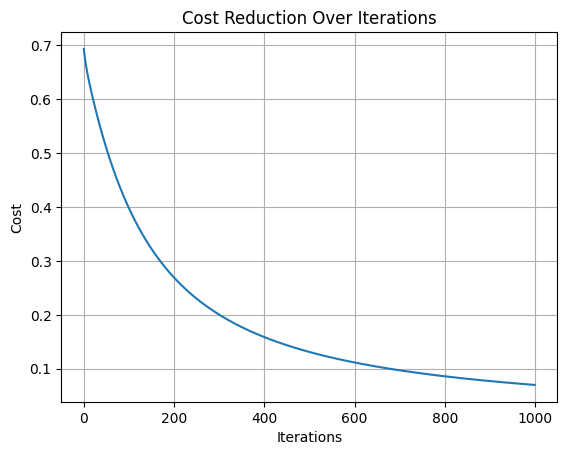

In [9]:
plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.grid(True)
plt.show()

accuracy of the model

In [10]:
def accuracy(y_true, y_pred):
    correct = 0
    total = y_true.shape[1]

    for i in range(total):
        if y_true[0][i] == y_pred[0][i]:
            correct += 1

    acc = (correct / total) * 100
    return acc


training Accuracy

In [11]:
y_pred_train = predict(w, b, X_train)

Testing Accuracy

In [12]:
y_pred_test = predict(w, b, X_test)

In [13]:
print(f"Train Accuracy: {accuracy(y_train, y_pred_train):.2f}%")
print(f"Test Accuracy: {accuracy(y_test, y_pred_test):.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 100.00%


Builtin function of sklearn to implements the logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Loading data

In [15]:
data = load_breast_cancer()
X = data.data
y = data.target

convert the data into dataframe

In [34]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


spliting the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


builtin logistic regression model

In [18]:
model = LogisticRegression(max_iter=10000) 

The model.fit method in scikit-learn is a built-in function used to train a machine learning model on a given dataset. It adjusts the model’s parameters (e.g., weights in logistic regression) to minimize the error on the training data.

In [19]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

prediction of model

In [20]:
y_pred = model.predict(X_test)


evaluation of model

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 95.6140350877193 %

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



weight and bais of model 

In [22]:
weights = model.coef_      
bias = model.intercept_

In [23]:
print("Weights:", weights)
print("Bias:", bias)

Weights: [[ 0.98208299  0.22519686 -0.36688444  0.0262268  -0.15507824 -0.22867976
  -0.52338614 -0.2793554  -0.22391176 -0.03605388 -0.09476544  1.39135347
  -0.16429246 -0.08903006 -0.02250974  0.04944847 -0.04186075 -0.03193634
  -0.03298528  0.01189208  0.10400464 -0.51389384 -0.01711567 -0.01662253
  -0.30695364 -0.75341491 -1.41533107 -0.50382259 -0.73542849 -0.09913574]]
Bias: [29.38522795]


In [41]:
from sklearn.metrics import log_loss
# Predict probabilities
prob_both = model.predict_proba(X_test)  

# Compute log loss
cost = log_loss(y_test, prob_both)
print(f"the cost is {cost}")


the cost is 0.07998671038539167
